In [167]:
#import numpy as np
from autograd import grad
import autograd.numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import math

%matplotlib inline

In [168]:
class MCMC(object):
    
    
    def __init__(self, times):
        self.times = times
        return
    
    
    # p is the hard distribution
    def P(self, x, t=1.0 ):
        return np.exp( -10*t*((x-2)**2) ) + 0.3*np.exp( -0.5*10*t*((x+1)**2) )

    
    def trueDistribution(self, x_domain):
        output = []
        for x in x_domain:
            output.append(self.P(x))
        return output
        
        
    def proposedDistribution(self):
        return 
    
    
    def run(self, step_size, tittle):
        
        self.step_size = step_size
        
        times_domain = range(self.times)
        mcmc_states1 = self.proposedDistribution()
        mcmc_states2 = self.proposedDistribution()
        mcmc_states3 = self.proposedDistribution()
        
        mcmc_states = np.concatenate((mcmc_states1, mcmc_states2, mcmc_states3))
        
        figure = plt.figure()
        figure.set_size_inches(20, 10, forward = True)
        subplot = figure.add_subplot(111)
        subplot.plot(times_domain, mcmc_states1, color='red', label="States 1st MCMC")
        subplot.plot(times_domain, mcmc_states2, color='blue', label="States 2nd MCMC")
        subplot.plot(times_domain, mcmc_states3, color='green', label="States 3rd MCMC")
        subplot.set_title(tittle, fontsize=30)
        subplot.legend(loc=2,prop={'size':20})
        plt.show()
        
        
        bins = 100
        x_domain = np.linspace(-2, 3, bins)
        true_distribution = self.trueDistribution(x_domain)
        mcmc_histogram = np.histogram(mcmc_states, bins = bins, density=True)
        mcmc_histogram = mcmc_histogram[0] / np.sum(mcmc_histogram[0])
        mcmc_histogram = mcmc_histogram * 17
        
        figure = plt.figure()
        figure.set_size_inches(20, 10, forward = True)
        subplot = figure.add_subplot(111)
        subplot.bar(x_domain, mcmc_histogram, width=1/bins, color='gray', label="MCMC Samples")
        subplot.plot(x_domain, true_distribution, color='purple', label="True Distribution")
        subplot.set_title("MCMC Samples VS True Distribution", fontsize=30)
        subplot.legend(loc=2,prop={'size':20})
        plt.show()


        

In [169]:
class MetropolisHastings(MCMC):
 
    
    def Q(self, x):
        return random.gauss(x, self.step_size)
    
    
    def proposedDistribution(self):
        
        state = 0.0
        states = [state]
        accepted = 0
        
        for time in range(self.times - 1):
            
            state_current = states[time]  
            state_proposed = self.Q(state_current)
            
            a = (self.P(state_proposed) * self.Q(state_proposed)) / (self.P(state_current) * self.Q(state_current))
            
            r = min(1, a)
            
            u = random.random()
            
            if (u < r):
                states.append(state_proposed)
                accepted = accepted + 1
            else:
                states.append(state_current)
         
        
        print("Acceptance rate = "+str(accepted/self.times))
        return states
    

        

In [170]:
class Hamiltonian(MCMC):
 
      
    def __init__(self, times):
        self.times = times
        self.gradientP = grad( self.P ) # this is the gradient of the function p
        return
    
    
    def proposedDistribution(self):
        
        L_leapfrog_steps = 5
        
        position = 0.0
        positions = [position]
        accepted = 0

        for time in range(self.times - 1):
            
            position_current = positions[time] 
            momentum_current = random.gauss(0,1)
            
            U_energy_current = -math.log10(self.P(position_current))
            K_energy_current = np.dot(momentum_current, momentum_current) / 2.0
            H_energy_current = K_energy_current + U_energy_current
            
            
            position_proposed = position_current
            momentum_proposed = momentum_current
            
            U_energy_proposed = U_energy_current
            K_energy_proposed = K_energy_current
            H_energy_proposed = H_energy_current
            
            
            for leapfrog_step in range(L_leapfrog_steps):
                U_energy_direction = self.gradientP(position_proposed)
                momentum_proposed = momentum_proposed - self.step_size * U_energy_direction / 2.0
                
                position_proposed = position_proposed + self.step_size * momentum_proposed
                
                U_energy_direction = self.gradientP(position_proposed)
                momentum_proposed = momentum_proposed - self.step_size * U_energy_direction / 2.0
                
                
            U_energy_proposed = -math.log10(self.P(position_proposed))
            K_energy_proposed = np.dot(momentum_proposed, momentum_proposed) / 2.0
            H_energy_proposed = K_energy_proposed + U_energy_proposed
            
            
            a = np.exp(-H_energy_proposed) / np.exp(-H_energy_current)
            r = min(1, a)
            u = random.random()
        
        
            if (u < r):
                positions.append(position_proposed)
                accepted = accepted + 1
            else:
                positions.append(position_current)
         
        
        print("Acceptance rate = "+str(accepted/self.times))
        return positions
    

        

In [171]:
mcmc1 = MetropolisHastings(times = 10000)

Acceptance rate = 0.8772
Acceptance rate = 0.8693
Acceptance rate = 0.8769


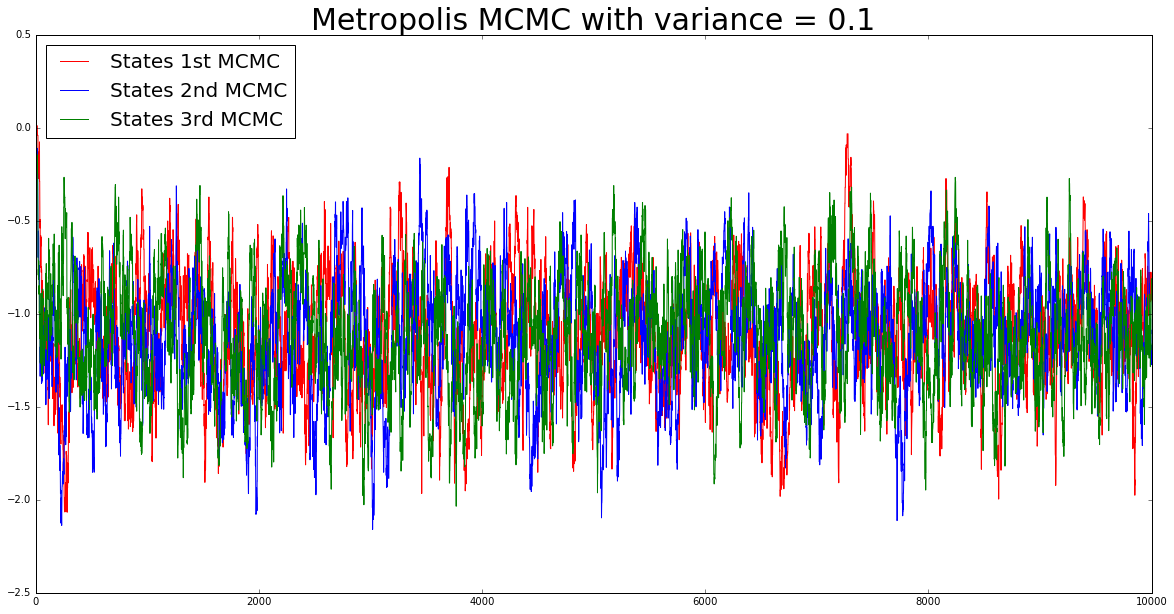

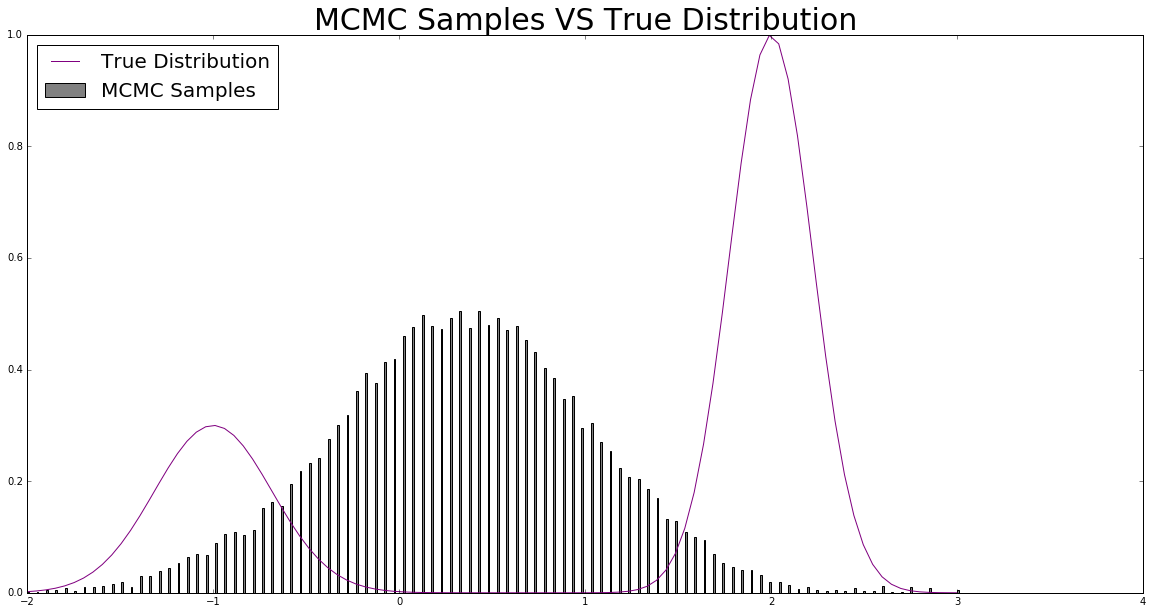

In [172]:
mcmc1.run(0.1, "Metropolis MCMC with variance = 0.1")

Acceptance rate = 0.2484
Acceptance rate = 0.2525
Acceptance rate = 0.2504


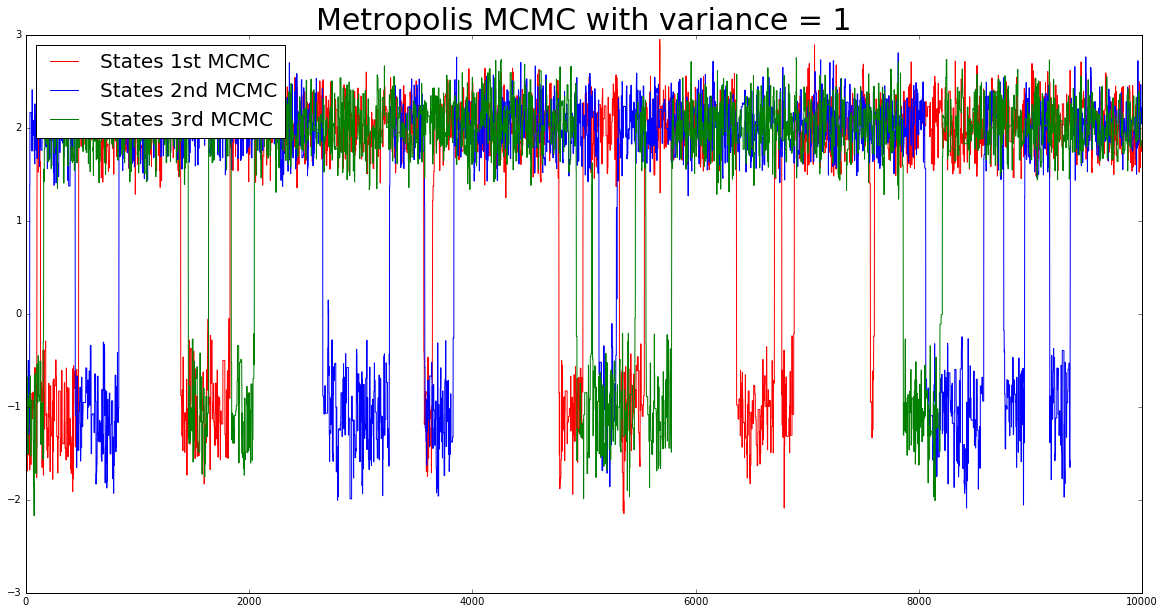

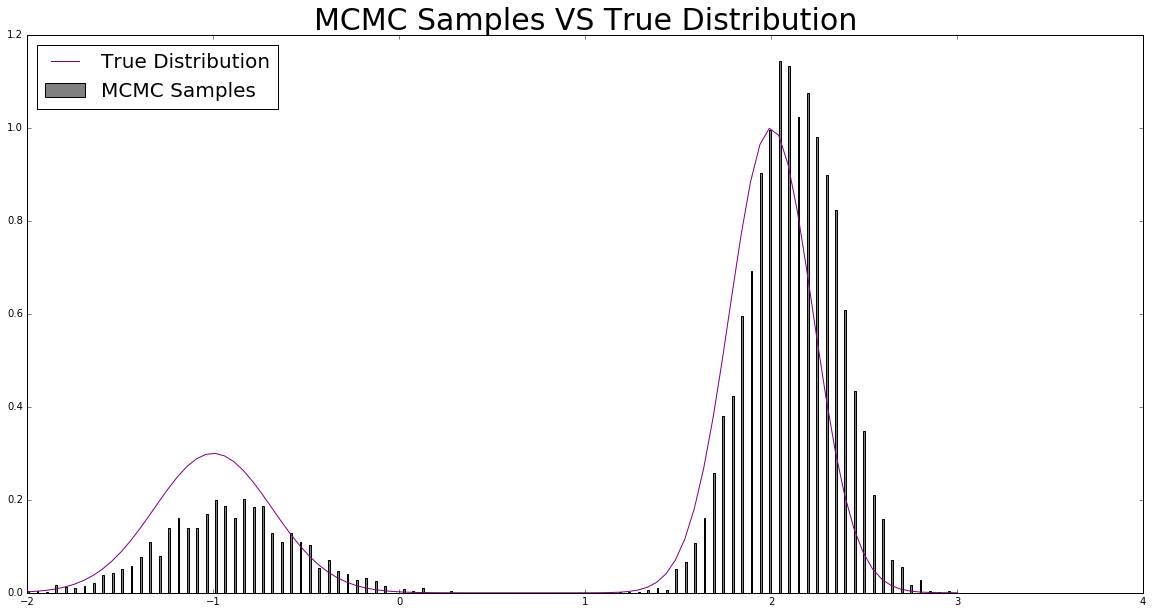

In [173]:
mcmc1.run(1, "Metropolis MCMC with variance = 1")

Acceptance rate = 0.0337
Acceptance rate = 0.0323
Acceptance rate = 0.0353


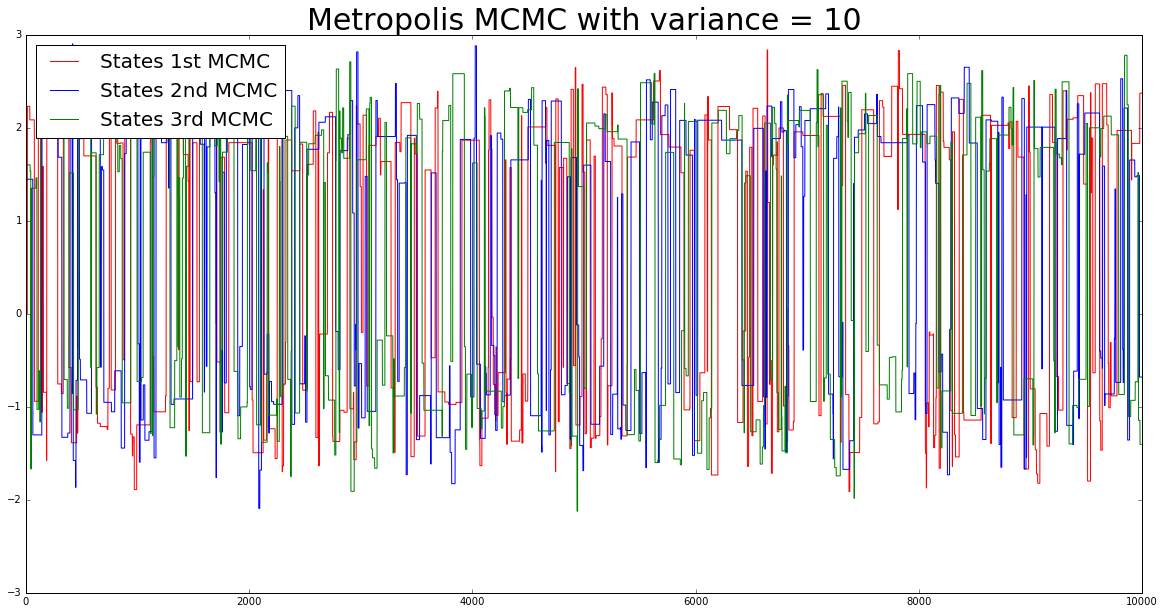

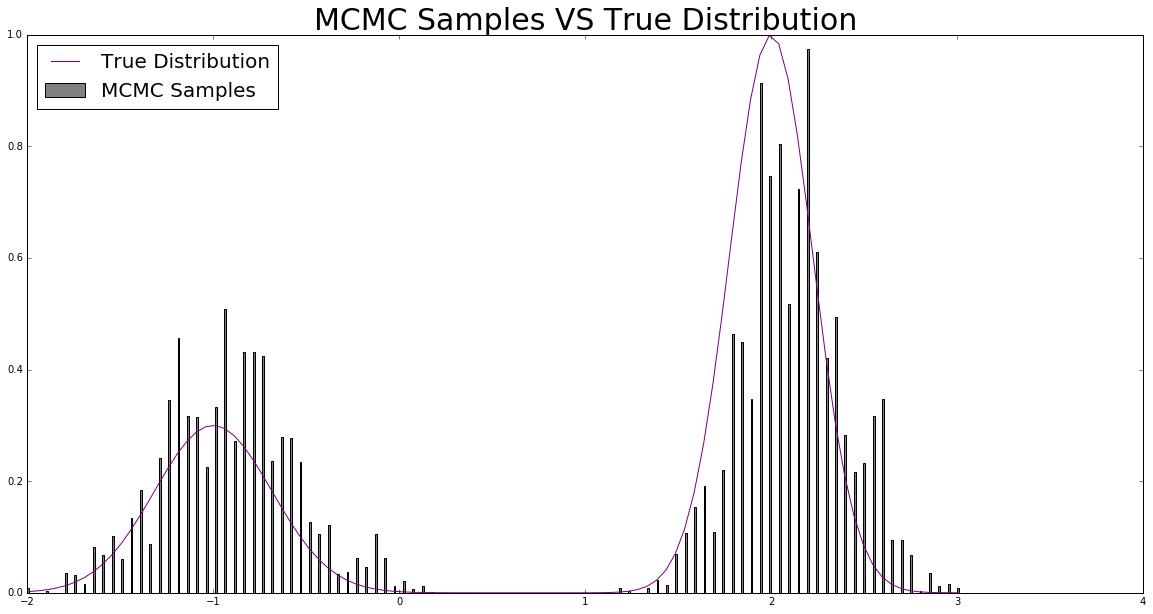

In [179]:
mcmc1.run(10, "Metropolis MCMC with variance = 10")

Acceptance rate = 0.21
Acceptance rate = 0.171
Acceptance rate = 0.184


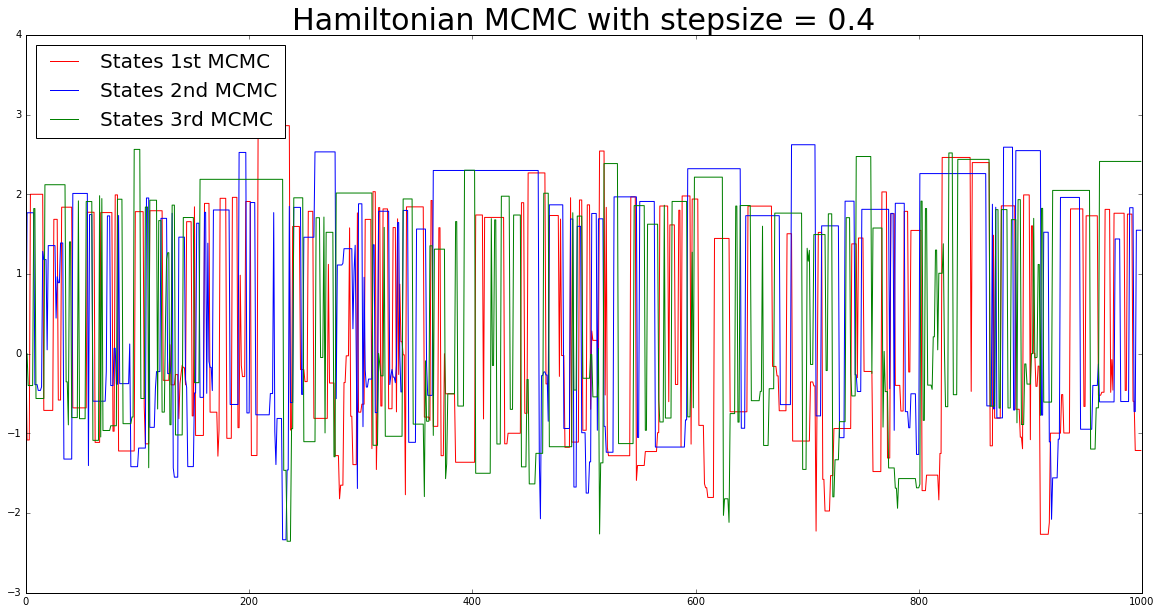

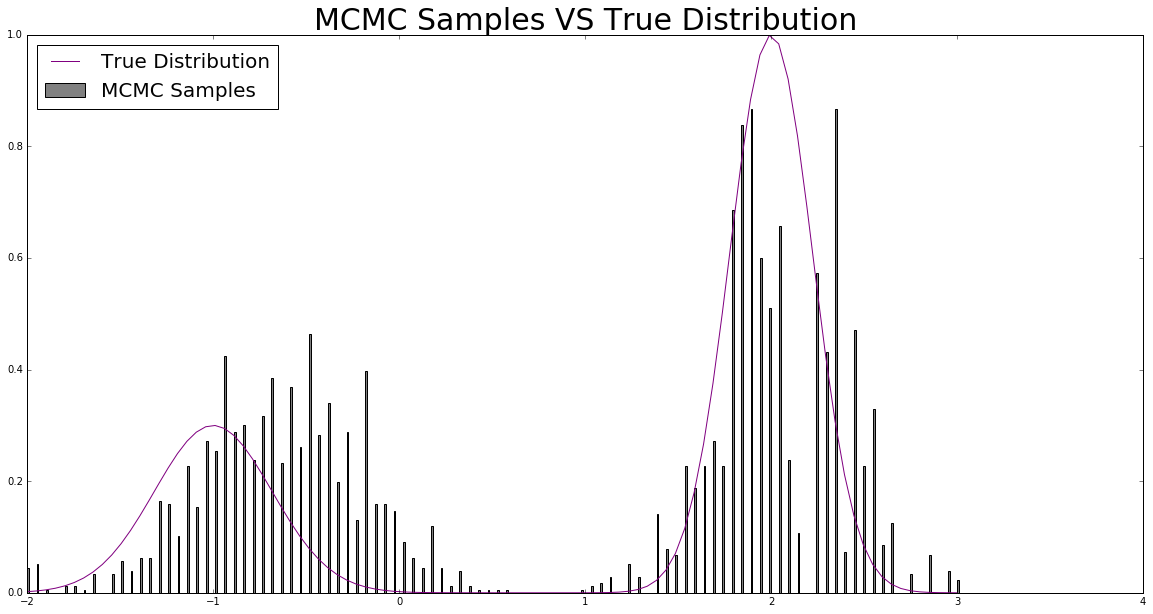

In [182]:
mcmc2 = Hamiltonian(times = 1000)
mcmc2.run(0.45, "Hamiltonian MCMC with stepsize = 0.4")

Acceptance rate = 0.808
Acceptance rate = 0.816
Acceptance rate = 0.828


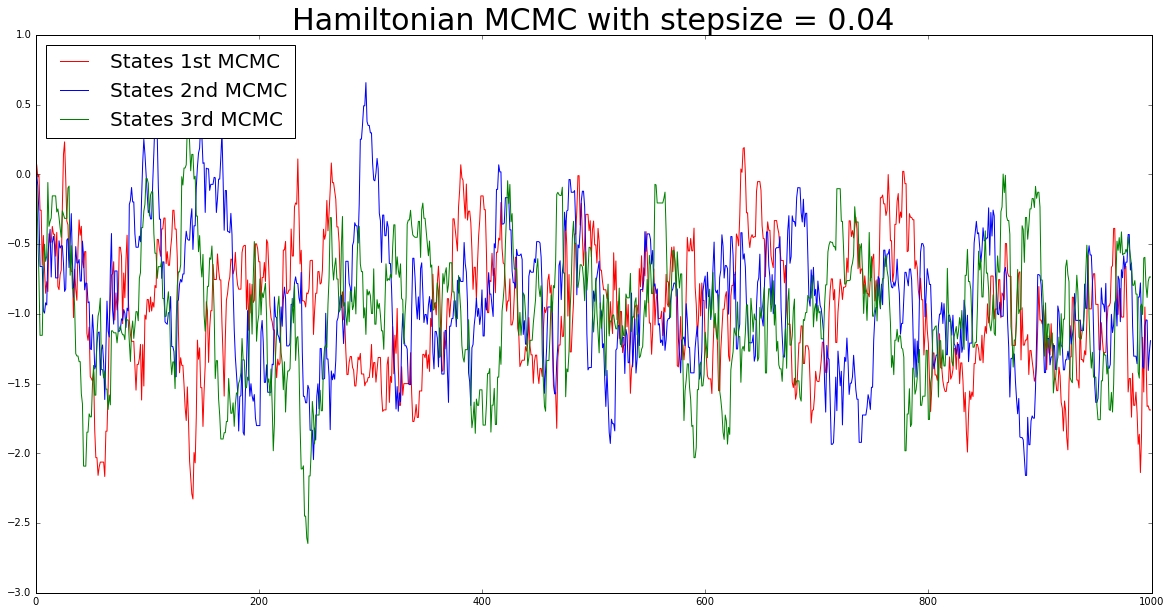

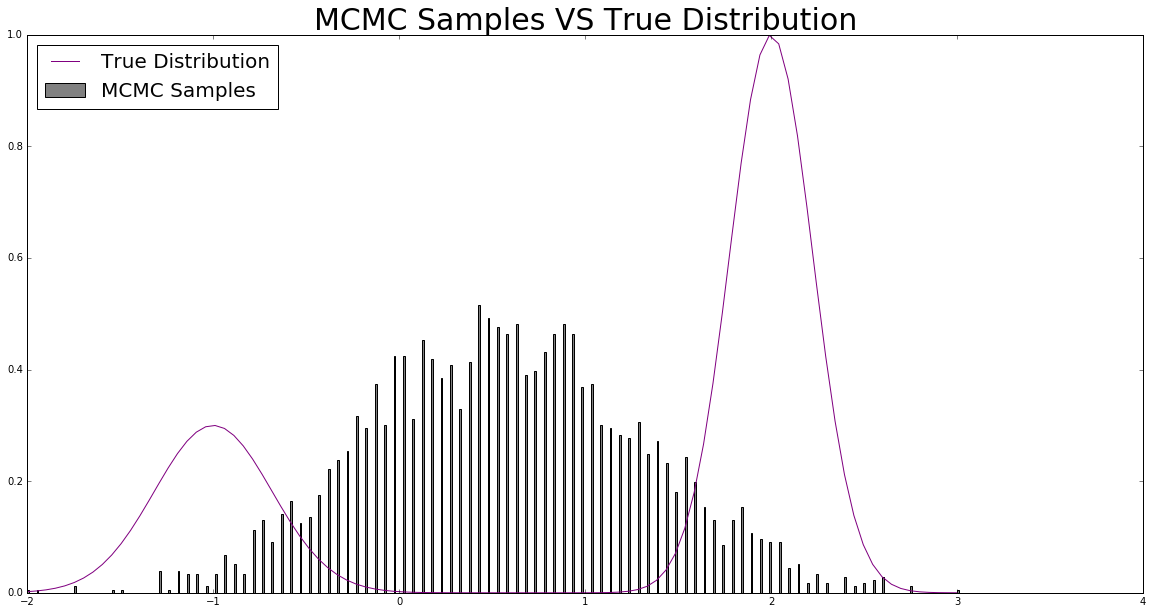

In [177]:
mcmc2.run(0.04, "Hamiltonian MCMC with stepsize = 0.04")

What was the acceptance rate of each algorithm? (ie, what percentage of proposals were accepted)
    - Metropolis MCMC with Gaussian variance = 0.1 accepted almost everything
    - Metropolis MCMC with variance = 1 accepted 1/4 of samples 
    - Metropilis MCMC with variance = 10 accepted 0.03 of samples
    - Hamiltonian MCMC with stepsize of 0.45 accepted 0.02 of samples
    - Hamiltonian MCMC with stepsize of 0.04 accepted 0.80 
    
Why don't some inference algorithms explore both modes of the density?
    - Because depending on how the Marcov states are being generated, states can be sampled from regions very close to the last sampled state, or by using methods like hamiltonian MCMC, samples can be generated from other regions even if they are very far from the last sampled state. So, some algorithms do not explore the second mode because their step size is very small that they can only generate states close to the last state, so they explore a very small area.

Why do some algorithms stay in the same state repeatedly? Is this good or bad?
    - If the algorithm stays in the same state for long periods of time, it means that it is exploring the space and it hasnt found a state with a good probability to decribe the underlying distribution. In addition, it might also mean that it is jumpying like crazy to explore distant regions, but if those regions do not describe the underlying distribution, they cannot be used to generate the next state
    
What were the best values for the variance of the momentum variables and the timestep you found? How did you know that they were good?
    - I found that big variance values and big step-size values where good because they allow the Marcov Chains to explore more regions.